In [86]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import ode
import numpy as np
import matplotlib
def F_vec(t,y_vec):
    a = 0.5
    buffer = np.zeros(shape=(3,),dtype=np.float32)
    y1 = y_vec[0]
    y2 = y_vec[1]
    y3 = y_vec[2]
    dy1dt = -y1 # FFA
    dy2dt = -dy1dt # Glu
    dy3dt = -dy1dt # TG
    buffer[0] = dy1dt
    buffer[1] = dy2dt
    buffer[2] = dy3dt
    return buffer

def F_vec2(t,y_vec):
    a = 0.5
    buffer = np.zeros(shape=(3,),dtype=np.float32)
    y1 = y_vec[0]
    y2 = y_vec[1]
    y3 = y_vec[2]
    dy1dt = -y1 # FFA
    dy2dt = -dy1dt # Glu
    dy3dt = -dy1dt # TG
    buffer[0] = dy1dt
    buffer[1] = dy2dt
    buffer[2] = dy3dt
    return buffer

    # d = len(alpha_vec)
    # print('dimension of problem {}'.format(d))
    # alpha_0 = np.copy(alpha_vec)
    # obj_func = make_obj_func(p_0,a,shared_integration_supports)
    # start_Loss = obj_func(alpha_0)
    # print('start from {}'.format(start_Loss))
    # bounds = np.zeros(shape=(d,2))
    # for j in range(d):
    #     bounds[j][0] = 0.0
    #     bounds[j][1] = 1.0
    # cons = [{"type": "eq", "fun": lambda x: np.sum(x)-1.0}]
    # options = {
    #     'verbose':2
    # }

    # results = minimize(fun=obj_func, x0=alpha_0,method='trust-constr', bounds=bounds,constraints=cons,options=options)
    # best_alpha = results['x']
    # print(results)

def F3(t, y_vec):
    buffer = np.zeros(shape=(3,),dtype=np.float32)
    y1 = y_vec[0]
    y2 = y_vec[1]
    y3 = y_vec[2]
    a1 = 2.0
    a4 = 1.0
    a2 = 2.0
    a3 = 1.0
    dy1dt = -a1*y1+a4*y2
    dy2dt = a1*y1-a4*y2+a3*y3-a2*y2 
    dy3dt = -a3*y3+a2*y2 
    buffer[0] = dy1dt
    buffer[1] = dy2dt
    buffer[2] = dy3dt
    return buffer




In [87]:
t_0 = 0.0
t_end = 200.0
k=10
start_point = 10*np.ones(shape=(k,))
a1v = np.zeros(shape=(2, k-1),dtype=np.float32)
for i in range(k-1):
    if i == 5:
        a1v[0][i] = 2.0
        a1v[1][i] = 1.0
    elif i == 6:
        a1v[0][i] = 2.0
        a1v[1][i] = 1.0
    else:
        a1v[0][i] = 2.0
        a1v[1][i] = 1.0
a2v = np.zeros(shape=(2,k-1),dtype=np.float32)
for i in range(k-1):
    a2v[0][i] = 1.0
    a2v[1][i] = 2.0
def Fr(t,y):
    dydt = np.zeros(shape=(k,),dtype=np.float32)
    a = None 
    for i in range(k):
        if t < 100.0:
            a = a1v
        else:
            a = a2v
        if i==0:
            dydt[i] = -a[0][i]*y[i]+a[1][i]*y[i+1]
        elif i==k-1:
            dydt[i] = a[0][i-1]*y[i-1]-a[1][i-1]*y[i]
        else:
            dydt[i] = a[0][i-1]*y[i-1] + a[1][i]*y[i+1] - a[1][i-1]*y[i]-a[0][i]*y[i]
    return dydt

solver = ode(f=Fr,jac=None)
solver.set_initial_value(y=start_point,t=t_0)
# solver_type = 'lsoda'
# solver_type = 'dopri5'
solver_type = 'vode'
solver.set_integrator(solver_type)
tau_grid = 0.01
N = int((t_end-t_0)/tau_grid)+1
time_grid = np.linspace(t_0,t_end,num=N) 
solutions = np.zeros(shape=(len(time_grid),len(start_point)),dtype=np.float32)
solutions[0,:] = solver.y
i_=  1
while solver.successful() and solver.t < t_end-tau_grid:
# while solver.t < t_end-tau_grid:
    solutions[i_,:] = solver.integrate(solver.t+tau_grid)
    i_ += 1 
print('last solver time step {} target last step {}'.format(i_, len(time_grid)-1))
time_sol = time_grid

# sol = solve_ivp(fun=Fr,t_span=(t_0,t_end),y0=start_point,method='Radau')
# solutions = sol.y.T
# time_sol = sol.t

last solver time step 20001 target last step 20000


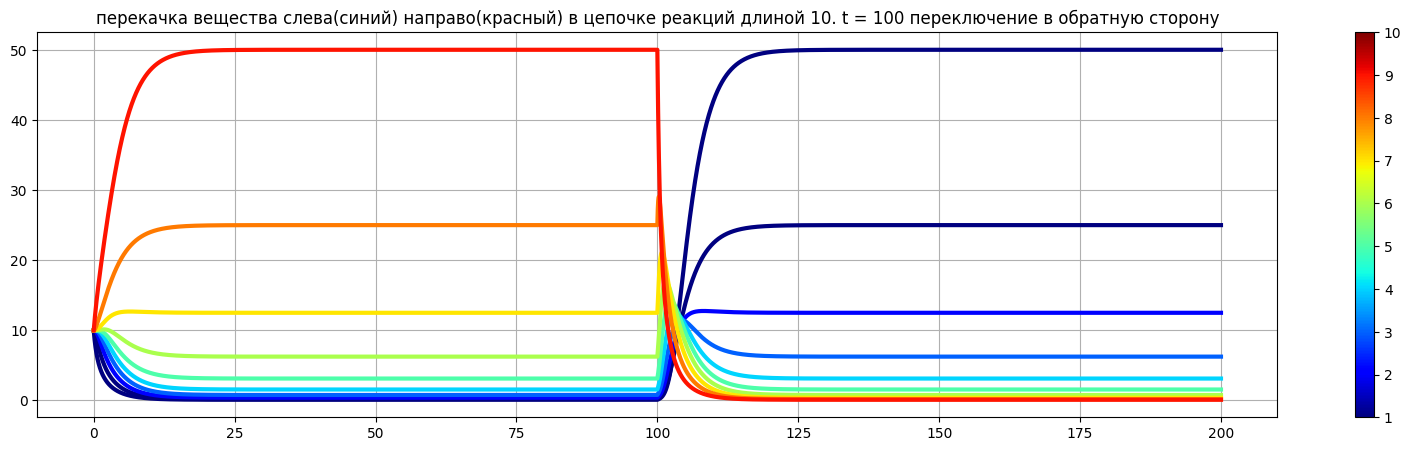

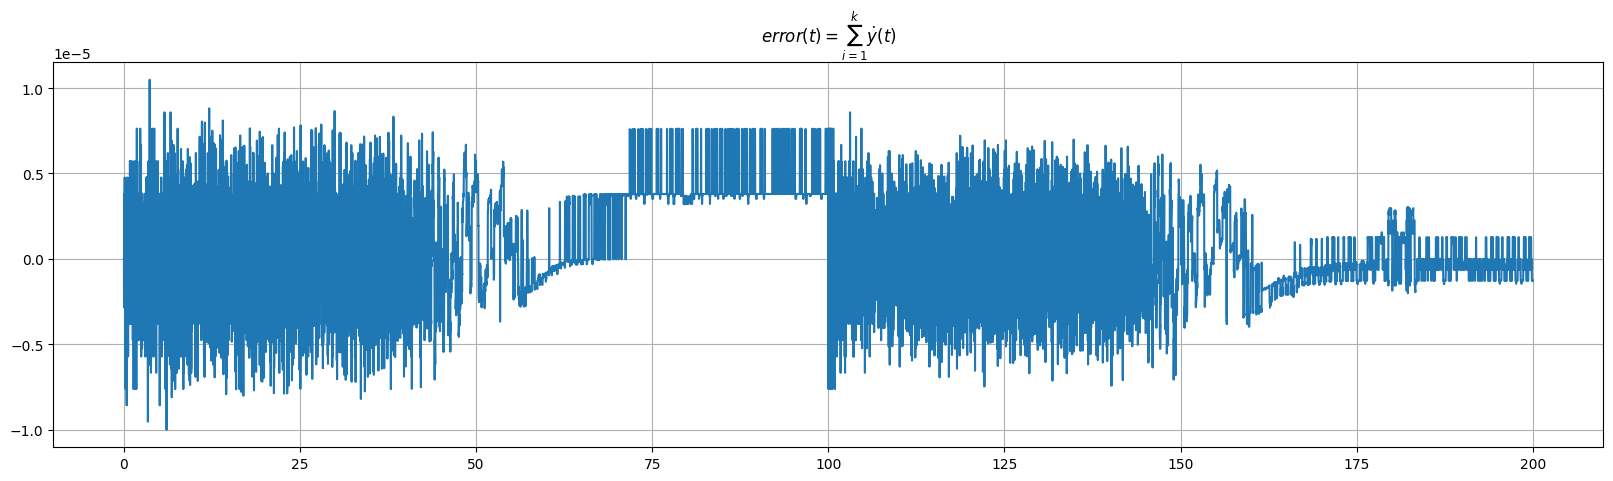

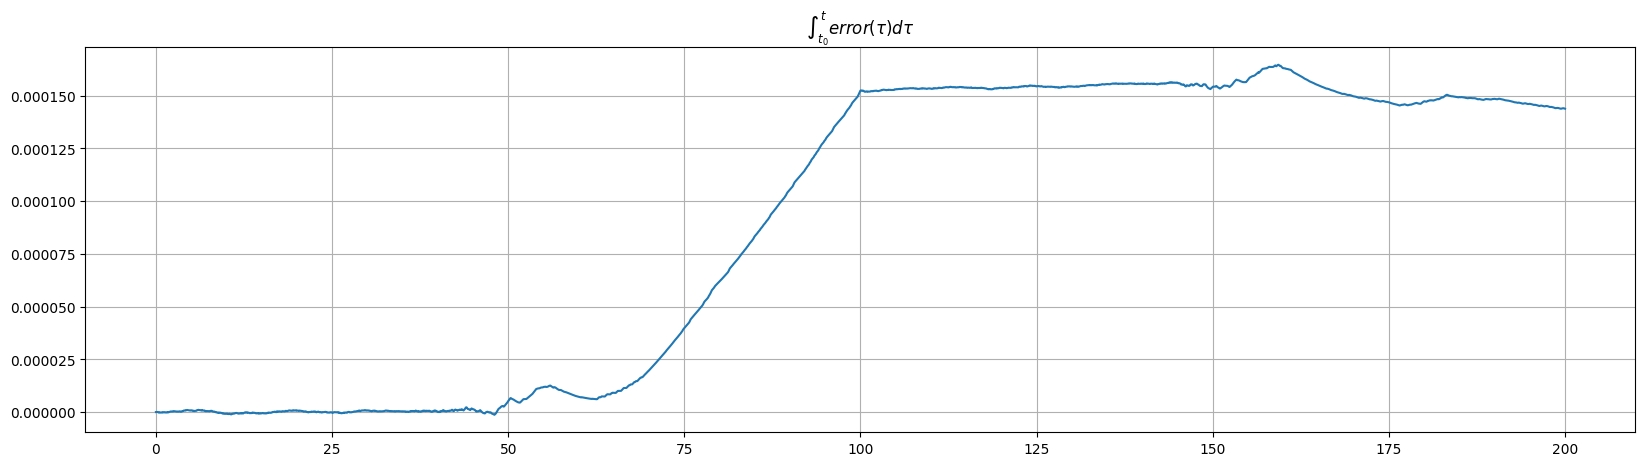

In [100]:
fig,ax = plt.subplots()
ax.set_title(f'перекачка вещества слева(синий) направо(красный) в цепочке реакций длиной {k}. t = 100 переключение в обратную сторону')
# ax.set_facecolor('black')
fig.set_size_inches(20,5)
y= solutions 
n_lines = k
c = np.arange(1, n_lines + 1)
norm = matplotlib.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = matplotlib.cm.ScalarMappable(norm=norm, cmap=matplotlib.cm.jet)
cmap.set_array([])
for i in range(k):
    ax.plot(time_sol, y[:,i],label = r'$y_{' + str(i) +r'}$',color= cmap.to_rgba(i),linewidth=3)
fig.colorbar(cmap, ticks=c,ax=ax)
# amount = k
# for i in range(k):
#     c = [float(i)/float(amount), 0.0, float(amount-i)/float(amount)]
#     ax.plot(time_sol, solutions[:,i],label = r'$y_{' + str(i) +r'}$',color= c)
dydt = np.zeros(shape=(len(y),k),dtype=np.float32)
for j in range(N):
    t = t_0 + tau_grid*j
    for i in range(k):
        if t < 100.0:
            a = a1v
        else:
            a = a2v
        if i==0:
            dydt[j,i] = -a[0][i]*y[j,i]+a[1][i]*y[j,i+1]
        elif i==k-1:
            dydt[j,i] = a[0][i-1]*y[j,i-1]-a[1][i-1]*y[j,i]
        else:
            dydt[j,i] = a[0][i-1]*y[j,i-1] + a[1][i]*y[j,i+1] - a[1][i-1]*y[j,i]-a[0][i]*y[j,i]

ax.set_xscale('linear')
ax.set_yscale('linear')
ax.grid(which='both')

fig,ax = plt.subplots()
fig.set_size_inches(20,5)
ax.set_title(r'$error(t) = \sum_{i=1}^{k} \dot{y}(t)$')
ax.plot(time_grid, np.sum(dydt,1))
ax.grid(which='both')

fig,ax = plt.subplots()
fig.set_size_inches(20,5)
ax.set_title(r'$\int_{t_{0}}^{t} error(\tau) d\tau$')
error_ = np.zeros(shape=(len(y),))
for i in range(1, len(y)):
    t_grid_i1 = time_grid[i-1]
    t_grid_i2 = time_grid[i]
    error_at_t1 = np.sum(dydt[i-1,:]) 
    error_at_t2 = np.sum(dydt[i,:]) 
    error_[i] = (error_at_t1+error_at_t2)*0.5*(t_grid_i2-t_grid_i1) 
error_ = np.cumsum(error_)
ax.plot(time_grid, error_)
ax.grid(which='both')

